In [11]:
import os
import sys
import json
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [12]:
if os.path.exists("../settings.json"):
    with open("../settings.json", "r") as f:
        settings = json.load(f)
        os.environ["OPENAI_API_KEY"] = settings["OPENAI_API_KEY"]
        os.environ["OPENAI_API_BASE"] = settings["OPENAI_API_BASE"]
else:
    raise Exception("settings.json not found!")

In [13]:
from PIL import Image
from IPython.core.display import HTML

from engine.utils import ProgramGenerator, ProgramInterpreter
from prompts.imgedit import PROMPT

In [14]:
interpreter = ProgramInterpreter(dataset='imageEdit')

Registering FACEDET step
Registering SEG step
Registering SELECT step


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Registering COLORPOP step
Registering BGBLUR step
Registering REPLACE step


Fetching 15 files: 100%|██████████| 15/15 [00:00<00:00, 39643.71it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Registering EMOJI step
Registering RESULT step


In [15]:
def create_prompt(instruction):
    return PROMPT.format(instruction=instruction)

generator = ProgramGenerator(prompter=create_prompt)

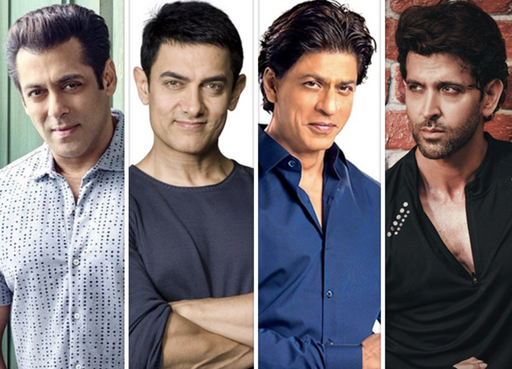

In [16]:
image = Image.open('../assets/bollywood.png')#.resize((512,512))
image.thumbnail((512,512),Image.Resampling.LANCZOS)
init_state = dict(
    IMAGE=image.convert('RGB')
)
image

In [21]:
instruction = "Replace man in black henley (person) with brick wall"
# instruction = "Hide Salman and Aamir's faces with :ps, Shahrukh's faces with 8) and Hritik's with ;)"
# instruction = "Create a colorpop of the man in black henley and also blur the background"
prog,_ = generator.generate(instruction)
print(prog)

OBJ0=SEG(image=IMAGE)
OBJ1=SELECT(image=IMAGE,object=OBJ0,query='man in black henley',category='person')
IMAGE0=REPLACE(image=IMAGE,object=OBJ1,prompt='brick wall')
FINAL_RESULT=RESULT(var=IMAGE0)


In [24]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)

`label_ids_to_fuse` unset. No instance will be fused.


SEG
dict_keys(['segmentation', 'segments_info'])
SELECT
REPLACE


100%|██████████| 50/50 [00:01<00:00, 34.77it/s]


RESULT


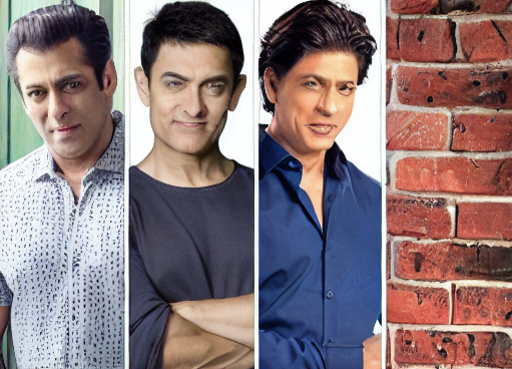

In [25]:
result


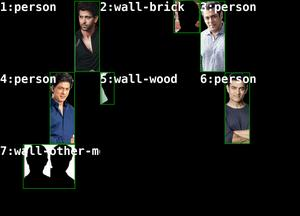
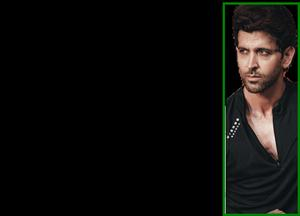
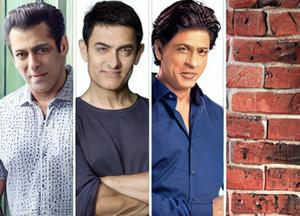
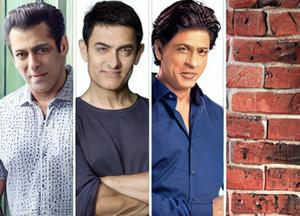

In [26]:
HTML(html_str)